In [1]:
# !mkdir mmdetection/configs/sartorius

[Kaggle notebook for mmdetection on sartorius](https://www.kaggle.com/awsaf49/sartorius-mmdetection-train#Custom-Config)  
[mmdetection docs with tutorials](https://mmdetection.readthedocs.io/en/latest/3_exist_data_new_model.html)

# My model

In [2]:
%%writefile mmdetection/configs/sartorius/my_model.py
_base_ = '../cascade_rcnn/cascade_mask_rcnn_r50_fpn_20e_coco.py'
############## HERE THE COPYPASTE STARTS ###############
# copypasted from mmdetection/configs/cascade_mask_rcn_r50_fpn_20e_coco.py
# the only changed thing is the number of classes (changed in 3 lines)
NUM_CLASSES = 3
bbox_head=[
    dict(
        type='Shared2FCBBoxHead',
        in_channels=256,
        fc_out_channels=1024,
        roi_feat_size=7,
        num_classes=NUM_CLASSES,
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0., 0., 0., 0.],
            target_stds=[0.1, 0.1, 0.2, 0.2]),
        reg_class_agnostic=True,
        loss_cls=dict(
            type='CrossEntropyLoss',
            use_sigmoid=False,
            loss_weight=1.0),
        loss_bbox=dict(type='SmoothL1Loss', beta=1.0,
                       loss_weight=1.0)),
    dict(
        type='Shared2FCBBoxHead',
        in_channels=256,
        fc_out_channels=1024,
        roi_feat_size=7,
        num_classes=NUM_CLASSES,
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0., 0., 0., 0.],
            target_stds=[0.05, 0.05, 0.1, 0.1]),
        reg_class_agnostic=True,
        loss_cls=dict(
            type='CrossEntropyLoss',
            use_sigmoid=False,
            loss_weight=1.0),
        loss_bbox=dict(type='SmoothL1Loss', beta=1.0,
                       loss_weight=1.0)),
    dict(
        type='Shared2FCBBoxHead',
        in_channels=256,
        fc_out_channels=1024,
        roi_feat_size=7,
        num_classes=NUM_CLASSES,
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0., 0., 0., 0.],
            target_stds=[0.033, 0.033, 0.067, 0.067]),
        reg_class_agnostic=True,
        loss_cls=dict(
            type='CrossEntropyLoss',
            use_sigmoid=False,
            loss_weight=1.0),
        loss_bbox=dict(type='SmoothL1Loss', beta=1.0, loss_weight=1.0))
]
################### HERE THE COPYPASTE FINISHES #############

# We also need to change the num_classes in head to match the dataset's annotation
model = dict(
    roi_head=dict(
        bbox_head=bbox_head,
        mask_head=dict(num_classes=3)))

# Modify dataset related settings
dataset_type = 'COCODataset'
classes = ('astro', 'shsy5y', 'cort',)
data = dict(
    samples_per_gpu=6,
    workers_per_gpu=18,
    train=dict(
        img_prefix='/data/kaggle_data/',
        classes=classes,
        ann_file='/data/mmdet/annotations_train.json'),
    val=dict(
        img_prefix='/data/kaggle_data/',
        classes=classes,
        ann_file='/data/mmdet/annotations_val.json'),
    test=dict(
        img_prefix='/data/kaggle_data/',
        classes=classes,
        ann_file='/data/mmdet/annotations_val.json'),
    )
checkpoint_config = dict(interval=6)

Overwriting mmdetection/configs/sartorius/my_model.py


# Inference

In [3]:
!ls data

In [4]:
conf_name = 'my_model'
config = f'configs/sartorius/{conf_name}.py'
model_file = f'../mmdet_workdir/epoch_20.pth'
result_pkl = f'../mmdet_workdir/{conf_name}.pkl'
additional_conf = '--cfg-options'
additional_conf += f' test_cfg.rcnn.score_thr={0.5}'
cmd = f'python tools/test.py {config} {model_file} --out {result_pkl}'
!cd mmdetection; {cmd}

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
load checkpoint from local path: ../mmdet_workdir/epoch_20.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 61/61, 5.2 task/s, elapsed: 12s, ETA:     0s
writing results to ../mmdet_workdir/my_model.pkl


In [5]:
import pickle
result = pickle.load(open('mmdet_workdir/my_model.pkl', 'rb'))

In [7]:
from src.postprocessing import postprocess_mmdet_predictions
preds = postprocess_mmdet_predictions(result)

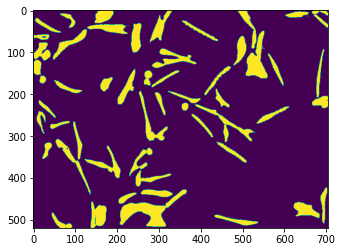

In [8]:
from matplotlib import pyplot as plt
plt.imshow(preds[0]['masks'].max(axis=0))